In [1]:
pip install elapid # Install the elapid library using pip [Series of Species Distribution Modeling Tools for python which includes Implementation of Maxent Model with biogeography data]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.8 MB/s eta 0:00:00


In [2]:
pip install geopandas # Install the geopandas library using pip [We can use it to work with geospatial data]

In [3]:
pip install rasterio # Install the rasterio library using pip [We can use it to read and manipulate raster datasets]

In [4]:
import matplotlib.pyplot as plt # For Data Visualization
import rasterio as rio # for Geospatial Raster Data
import geopandas as gpd # for Geospatial Data, specifically Vector Data
import pandas as pd  # For Data Manipulation and Analysis Tool
import elapid as ela  # Species Distribution Modeling Tools
import rasterio.plot as rioplot # To Visualize Raster Data
import warnings # To Ignore all the Warning Messages
import os # To Load the Datasets/Files from the Specified Directory
import re # For Patterns, i.e., used to match and manipulate strings
from sklearn import metrics # For Evaluation Metrics (To assess the performance)

In [5]:
# PLot Preferences
plt.style.use('ggplot')

# Ignore the Warning Messages
warnings.filterwarnings("ignore")

# Define the color for barplots
pair_colors = ['#FFCC02', '#00458C']

In [6]:
# Mount Google Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

# After mounting Google Drive, we can access files and directories within it

Mounted at /content/drive


In [7]:
# background data or raster
bio_clim='/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/'
#os path join to read background data
bioclimate_variables=[os.path.join(bio_clim,f) for f in os.listdir(bio_clim) if f.endswith(".tif")]
#bioclimate_variables

In [8]:
# Function to extract the Bioclimatic Variable Number from the path

def extract_number(path):
    # Extract the number using regular expression
    match = re.search(r'Bio_(\d+)', path)
    if match:
        return int(match.group(1))
    return 0

# Sort the paths based on the extracted number
sorted_paths = sorted(bioclimate_variables, key=extract_number)

# Print the sorted paths
for bioclimate_variables in sorted_paths:
    print(bioclimate_variables)

# Save the sorted paths in a list
bioclimate_variables = list(sorted_paths)

/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_1_Annual_mean_Temperature_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_2_Mean_Diurnal_Range_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_3_Isothermality_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_4_Temperature_Seasonality_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa(2011-2040).tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_2011-2040/cropped_Bio_7_Temperature_Annual_R

In [9]:
# Add the Labels for Map
# Read the file path and split them, since we need only bioclim variables names

labels = []  # Initialize labels as an empty list
for i in bioclimate_variables:
    filename = os.path.basename(i)
    filename_without_extension = os.path.splitext(filename)[0]
    labels.append(filename_without_extension)
print(labels)

['cropped_Bio_1_Annual_mean_Temperature_Chelsa(2011-2040)', 'cropped_Bio_2_Mean_Diurnal_Range_Chelsa(2011-2040)', 'cropped_Bio_3_Isothermality_Chelsa(2011-2040)', 'cropped_Bio_4_Temperature_Seasonality_Chelsa(2011-2040)', 'cropped_Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa(2011-2040)', 'cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa(2011-2040)', 'cropped_Bio_7_Temperature_Annual_Range_Chelsa(2011-2040)', 'cropped_Bio_8_Mean_Temperature_of_Wettest_Quarter_Chelsa(2011-2040)', 'cropped_Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa(2011-2040)', 'cropped_Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa(2011-2040)', 'cropped_Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa(2011-2040)', 'cropped_Bio_12_Annual_Precipitation_Chelsa(2011-2040)', 'cropped_Bio_13_Precipitation_of_Wettest_Month_Chelsa(2011-2040)', 'cropped_Bio_14_Precipitation_of_Driest_Month_Chelsa(2011-2040)', 'cropped_Bio_15_Precipitation_of_Seasonality_Chelsa(2011-2040)', 'cropped_Bio_16_Precipitation_of_W

In [10]:
# Reading Bug Data (Species Data), also called as Presence data in the Geopackage File Format

# read the presence data, draw background point samples
bug_Presence_data = gpd.read_file('/content/drive/MyDrive/Project_2/Insect Pest/Species Data/EDD Maps site/Halyomorpha_halys(1999_2023).gpkg')

In [11]:
# Convert the 'ObsDate' column to datetime format
bug_Presence_data['ObsDate'] = pd.to_datetime(bug_Presence_data['ObsDate'])

# Filter the data for the years 2011 to 2022
presence = bug_Presence_data[(bug_Presence_data['ObsDate'].dt.year >= 1999) & (bug_Presence_data['ObsDate'].dt.year <= 2023)]
presence.head()


,objectid,reporter,RecOwner,SciName,ComName,Nativity,OccStatus,Status,ObsDate,DateEnt,...,Reference,Locality,Comments,ReviewDate,Reviewer,VerifyMthd,Verified,IDCred,ReviewComm,geometry
0,2001093,Chester Karwatowski Cornell Cooperative Extension,General Public,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2011-04-11,01-11-12,...,NaN,NaN,"""blackberry photo uploaded via web form""",11-01-17,Peter Jentsch,Bulk Verified,Verified,Credible,"""Thank you for your submission and image to E...",POINT (-74.28114 41.96179)
1,2001094,Chester Karwatowski Cornell Cooperative Extension,General Public,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2011-04-11,01-11-12,...,NaN,NaN,"""blackberry via web upload. samples taken""",11-01-17,Peter Jentsch,Bulk Verified,Verified,Credible,"""Thank you for your submission and image to E...",POINT (-74.10828 42.07733)
2,2278464,stewart hanford Whats Invasive,General Public,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2012-04-21,05-23-12,...,NaN,NaN,"""Had one in house""",11-01-17,Peter Jentsch,Bulk Verified,Verified,Credible,"""Thank you for your submission and image to E...",POINT (-73.92247 41.63886)
3,2278465,stewart hanford Whats Invasive,General Public,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2012-05-13,05-23-12,...,NaN,NaN,"""In livingroom""",11-01-17,Peter Jentsch,Bulk Verified,Verified,Credible,"""Thank you for your submission and image to E...",POINT (-73.92251 41.63883)
4,2278466,stewart hanford Whats Invasive,General Public,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2012-05-07,05-23-12,...,NaN,NaN,NaN,11-01-17,Peter Jentsch,Bulk Verified,Verified,Credible,"""Thank you for your submission and image to E...",POINT (-73.92287 41.63884)


# Bio_1_Annual_mean_Temperature_Chelsa_2011_2040

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[0], count=10_000)
background.head()

0    POINT (-116.66250 45.49583)
1    POINT (-121.17917 44.66250)
2     POINT (-70.22917 44.42917)
3     POINT (-96.66250 31.65417)
4     POINT (-83.31250 37.09583)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

,geometry,class,b01,b02,b03,b04,b05,b06,b07,b08,...,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
0,POINT (-74.28114 41.96179),1,2839,96,2,9116,3014,2656,358,2789,...,2956,2718,14890,1627,878,155,4237,3004,3639,3503
1,POINT (-74.10828 42.07733),1,2814,98,2,8308,2980,2646,334,2771,...,2922,2706,18107,2007,1035,166,5238,3661,4379,4271
2,POINT (-73.92247 41.63886),1,2855,98,2,8963,3033,2675,358,2961,...,2972,2738,13078,1380,755,159,3685,2513,3539,2994
3,POINT (-73.92251 41.63883),1,2855,98,2,8963,3033,2675,358,2961,...,2972,2738,13078,1380,755,159,3685,2513,3539,2994
4,POINT (-73.92287 41.63884),1,2855,98,2,8963,3033,2675,358,2961,...,2972,2738,13078,1380,755,159,3685,2513,3539,2994


In [ ]:
# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model1c.ela')

Training AUC score: 0.981


In [ ]:
# Write the model predictions to disk
output_raster1 = 'Annual_mean_Temperature_Chelsa_Prediction_2011-2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster1, quiet=True)

# and read into memory
with rio.open(output_raster1, 'r') as src:
    pred = src.read(1, masked=True)

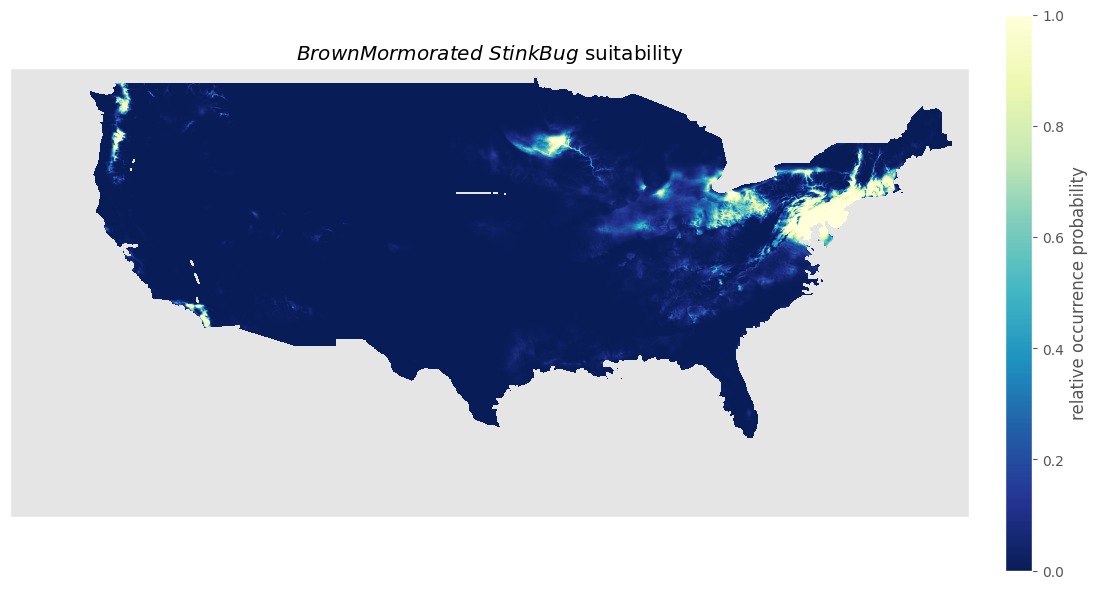

In [ ]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot1 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar1 = plt.colorbar(plot1, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file1 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Annual_mean_Temperature_Chelsa_Prediction_2011-2040.tif'
cbar1.ax.figure.savefig(colorbar_file1, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_2_Mean_Diurnal_Range_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[1], count=10_000)
background.head()

0     POINT (-86.97917 32.39583)
1    POINT (-111.84583 41.47917)
2    POINT (-111.64583 42.36250)
3    POINT (-101.57083 41.47917)
4     POINT (-89.93750 44.71250)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.981


In [ ]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model2c.ela')

# Write the model predictions to disk
output_raster2 = 'Mean_Diurnal_Range_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster2, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster2, 'r') as src:
    pred = src.read(1, masked=True)

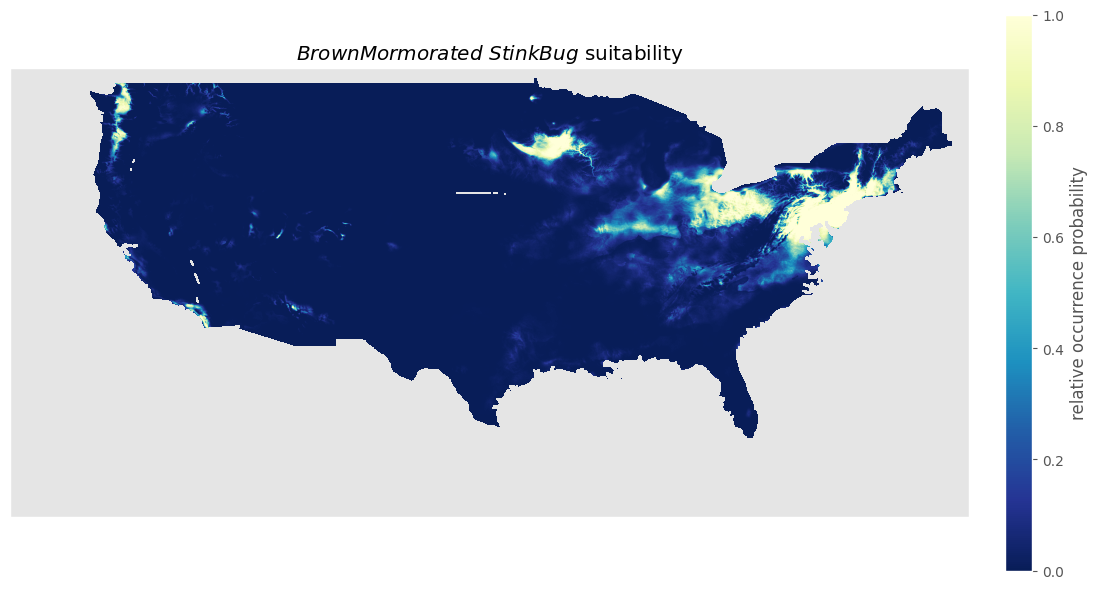

In [ ]:
# Plot the Suitability Predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot2 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar2 = plt.colorbar(plot2, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file2 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Mean_Diurnal_Range_Chelsa_Prediction_2011_2040.tif'
cbar2.ax.figure.savefig(colorbar_file2, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_3_Isothermality_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[2], count=10_000)
background.head()

0    POINT (-127.82917 38.49583)
1     POINT (-99.37083 22.57083)
2    POINT (-114.32917 40.15417)
3     POINT (-90.46250 47.04583)
4    POINT (-128.53750 43.81250)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.983


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model3c.ela')

# Write the model predictions to disk
output_raster3 = 'Isothermality_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster3, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster3, 'r') as src:
    pred = src.read(1, masked=True)

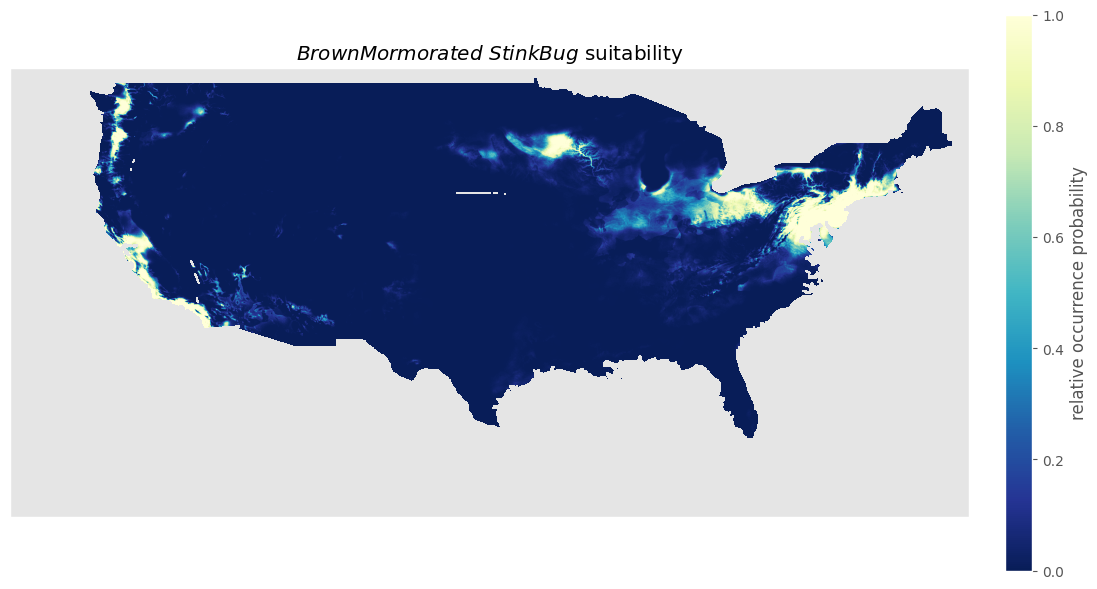

In [ ]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot3 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar3 = plt.colorbar(plot3, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file3 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Isothermality_Chelsa_Prediction_2011_2040.tif'
cbar3.ax.figure.savefig(colorbar_file3, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_4_Temperature_Seasonality_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[3], count=10_000)
background.head()

0     POINT (-78.66250 40.68750)
1     POINT (-68.30417 46.45417)
2    POINT (-116.88750 41.52917)
3     POINT (-80.63750 33.63750)
4     POINT (-70.42917 41.57917)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [ ]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.981


In [ ]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model4c.ela')

# Write the model predictions to disk
output_raster4 = 'Temperature_Seasonality_Chelsa_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster4, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster4, 'r') as src:
    pred = src.read(1, masked=True)


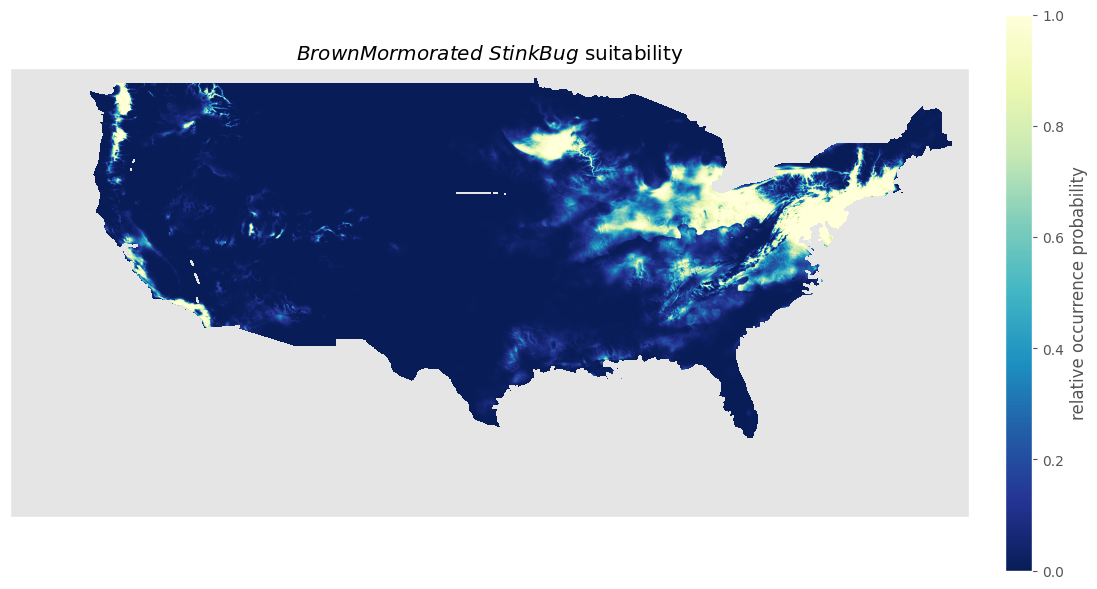

In [ ]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot4 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar4 = plt.colorbar(plot4, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file4 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Temperature_Seasonality_Chelsa_2011_2040.tif'
cbar4.ax.figure.savefig(colorbar_file4, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[4], count=10_000)
background.head()

0     POINT (-94.04583 45.49583)
1     POINT (-85.72917 35.40417)
2    POINT (-102.90417 42.17083)
3    POINT (-102.47917 42.47917)
4     POINT (-99.52917 38.66250)
dtype: geometry

In [ ]:
# Merge Datasets and Read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.981


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model5c.ela')

#Write the model predictions to disk
output_raster5 = 'Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster5, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster5, 'r') as src:
    pred = src.read(1, masked=True)


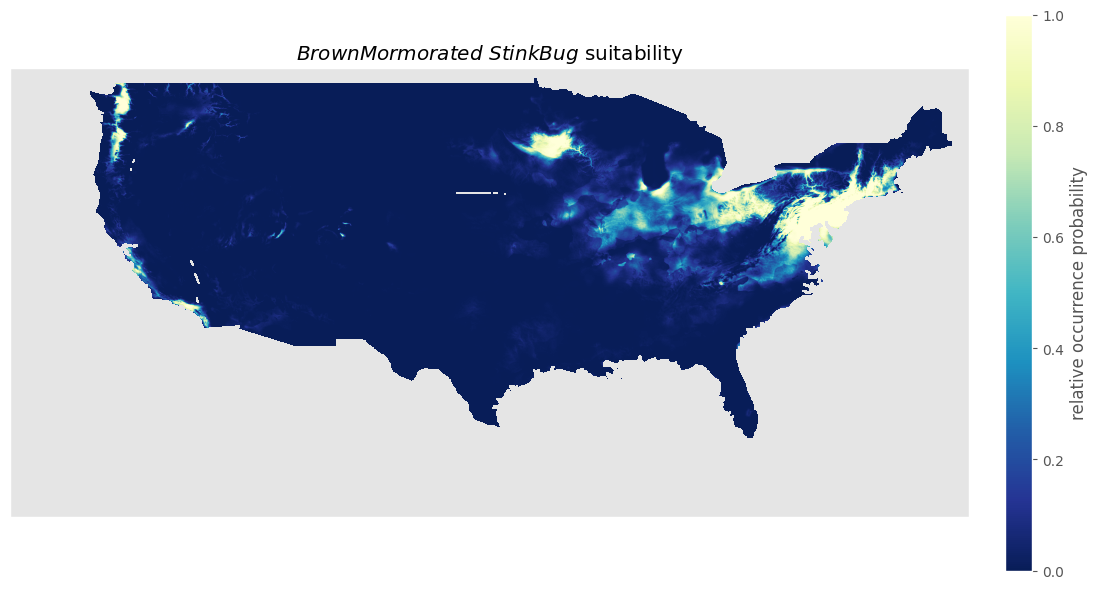

In [ ]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot5 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar5 = plt.colorbar(plot5, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file5 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_2011_2040.tif'
cbar5.ax.figure.savefig(colorbar_file5, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_2011_2040.tif


In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[5], count=10_000)
background.head()

0    POINT (-113.50417 41.74583)
1    POINT (-104.37917 33.72917)
2    POINT (-116.94583 43.10417)
3     POINT (-82.21250 43.74583)
4    POINT (-105.09583 38.72083)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.980


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model6c.ela')

# Write the model predictions to disk
output_raster6 = 'Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster6, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster6, 'r') as src:
    pred = src.read(1, masked=True)


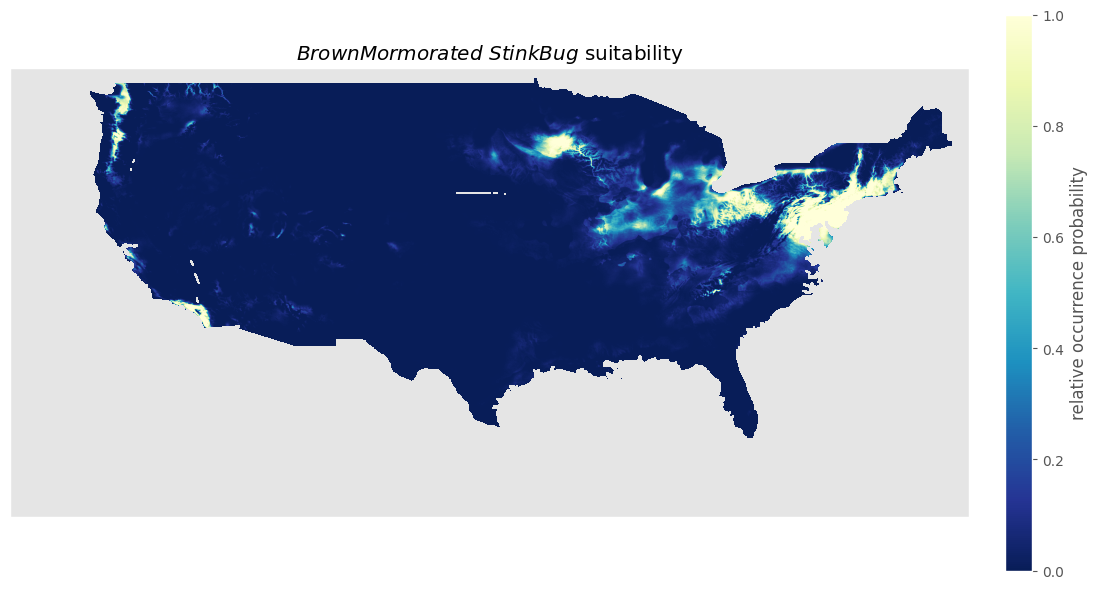

In [ ]:
 # Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot6 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar6 = plt.colorbar(plot6, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file6= '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_2011_2040.tif'
cbar6.ax.figure.savefig(colorbar_file6, format='tiff')

# Close the figure to free up memory
plt.close(fig)

In [ ]:
#Bio_7_Temperature_Annual_Range_Chelsa_2011_2040

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[6], count=10_000)
background.head()

0     POINT (-88.30417 31.20417)
1    POINT (-100.57083 45.40417)
2     POINT (-84.20417 42.37083)
3    POINT (-122.06250 38.99583)
4    POINT (-115.27917 43.97083)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.981


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model7c.ela')

# Write the model predictions to disk
output_raster7 = 'Temperature_Annual_Range_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster7, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster7, 'r') as src:
    pred = src.read(1, masked=True)


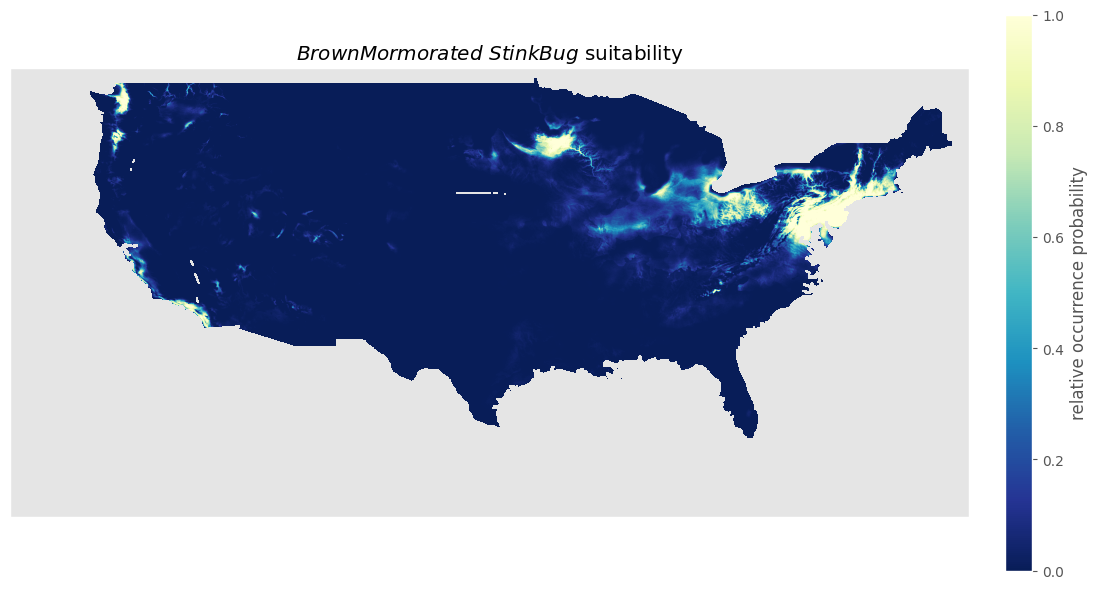

In [ ]:

# Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot7 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar7 = plt.colorbar(plot7, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file7 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Temperature_Annual_Range_Chelsa_Prediction_2011_2040.tif'
cbar7.ax.figure.savefig(colorbar_file7, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_8_Mean_Temperature_of_Wettest_Quarter_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[7], count=10_000)
background.head()

0    POINT (-121.88750 34.78750)
1     POINT (-82.31250 47.31250)
2    POINT (-107.80417 38.76250)
3     POINT (-72.20417 20.47083)
4     POINT (-75.12917 47.25417)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.984


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model8c.ela')

# Write the model predictions to disk
output_raster8 = 'Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster8, quiet=True)

In [ ]:
# Read into memory
with rio.open(output_raster8, 'r') as src:
    pred = src.read(1, masked=True)


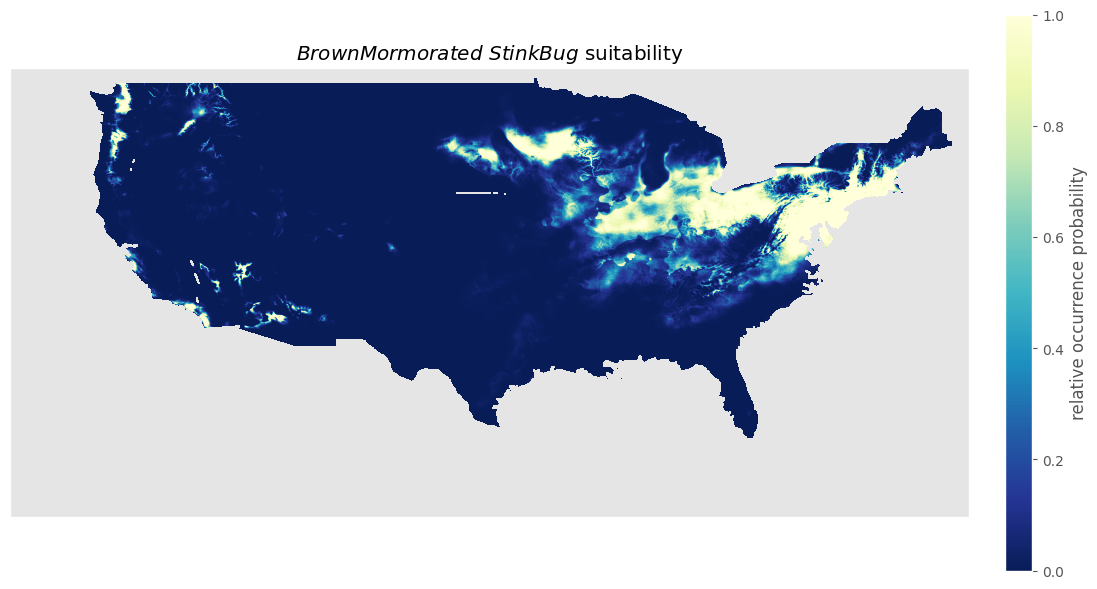

In [ ]:
   # Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot8 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar8 = plt.colorbar(plot8, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file1 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar1.ax.figure.savefig(colorbar_file1, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[8], count=10_000)
background.head()

0     POINT (-72.98750 35.09583)
1    POINT (-115.07917 21.42083)
2    POINT (-127.77083 31.62917)
3     POINT (-66.92917 32.33750)
4     POINT (-70.91250 33.77917)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.983


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model9c.ela')

# Write the model predictions to disk
output_raster9 = 'Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster9, quiet=True)

# Read into memory
with rio.open(output_raster9, 'r') as src:
    pred = src.read(1, masked=True)


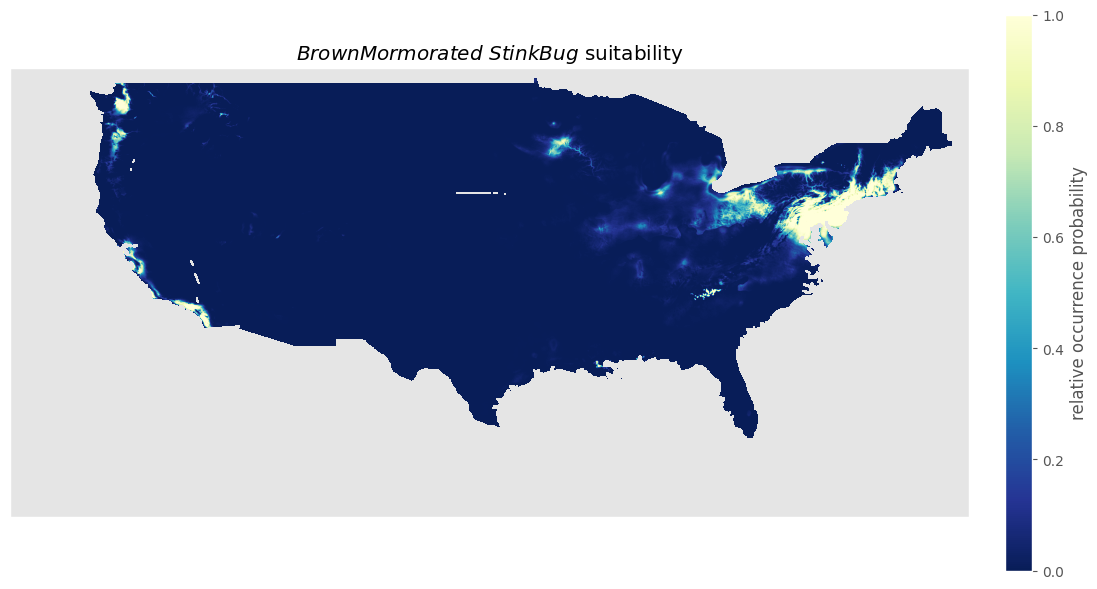

In [ ]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot9 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar9 = plt.colorbar(plot9, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file9 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar9.ax.figure.savefig(colorbar_file9, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa_2011_2040.tif

In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[9], count=10_000)
background.head()

0    POINT (-84.06250 20.43750)
1    POINT (-84.88750 44.41250)
2    POINT (-71.66250 21.84583)
3    POINT (-79.57917 25.39583)
4    POINT (-77.17917 29.82083)
dtype: geometry

In [ ]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [ ]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [ ]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.982


In [ ]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster10 = 'Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster10, quiet=True)

# Read into memory
with rio.open(output_raster10, 'r') as src:
    pred = src.read(1, masked=True)


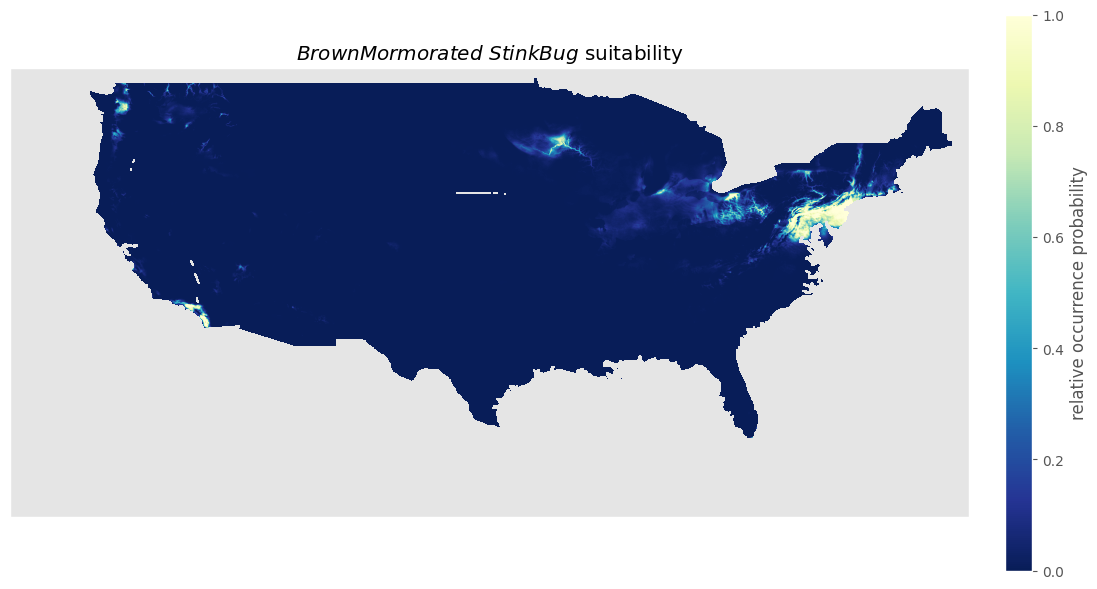

In [ ]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot10 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar10 = plt.colorbar(plot10, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [ ]:
# Save the colorbar as a TIFF file
colorbar_file10 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar10.ax.figure.savefig(colorbar_file10, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa_2011_2040.tif

In [12]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[10], count=10_000)
background.head()

0    POINT (-112.42083 49.73750)
1    POINT (-107.89583 37.66250)
2     POINT (-73.18750 41.27917)
3    POINT (-113.88750 30.67083)
4    POINT (-127.04583 46.47083)
dtype: geometry

In [13]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [14]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [15]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [16]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.983


In [17]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model11c.ela')

# Write the model predictions to disk
output_raster11 = 'Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster11, quiet=True)

# Read into memory
with rio.open(output_raster11, 'r') as src:
    pred = src.read(1, masked=True)

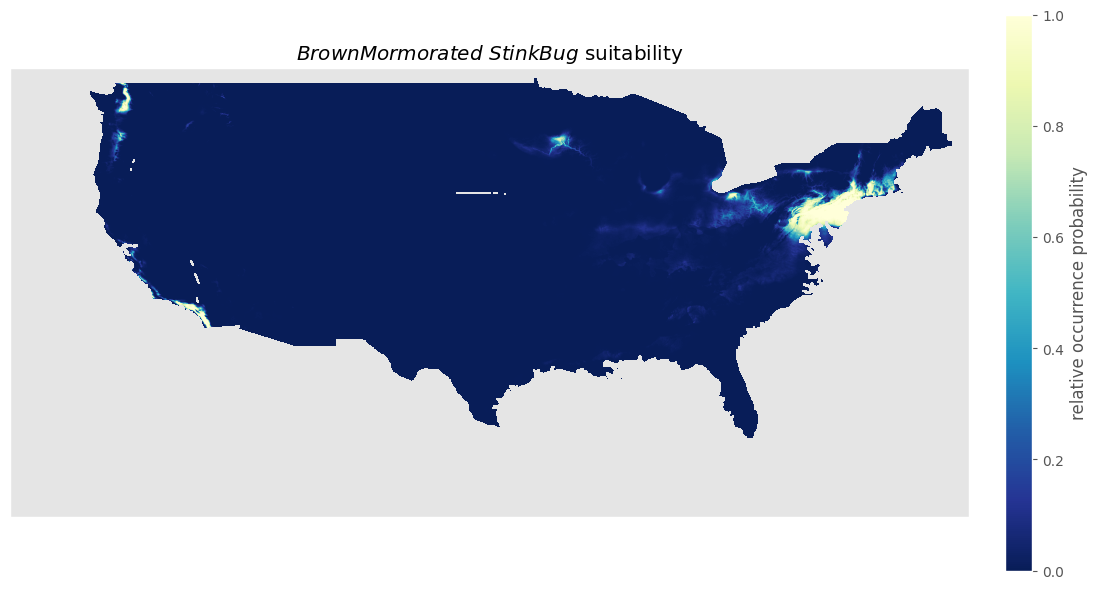

In [18]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot11 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar11 = plt.colorbar(plot11, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [19]:
# Save the colorbar as a TIFF file
colorbar_file11 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar11.ax.figure.savefig(colorbar_file11, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_12_Annual_Precipitation_Chelsa_2011_2040.tif

In [20]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[11], count=10_000)
background.head()

0     POINT (-82.47083 43.45417)
1    POINT (-107.17083 42.97917)
2    POINT (-111.55417 38.10417)
3    POINT (-121.91250 38.15417)
4    POINT (-112.72083 38.82917)
dtype: geometry

In [21]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [22]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [23]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [24]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.980


In [25]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster12 = 'Annual_Precipitation_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster12, quiet=True)

# Read into memory
with rio.open(output_raster12, 'r') as src:
    pred = src.read(1, masked=True)


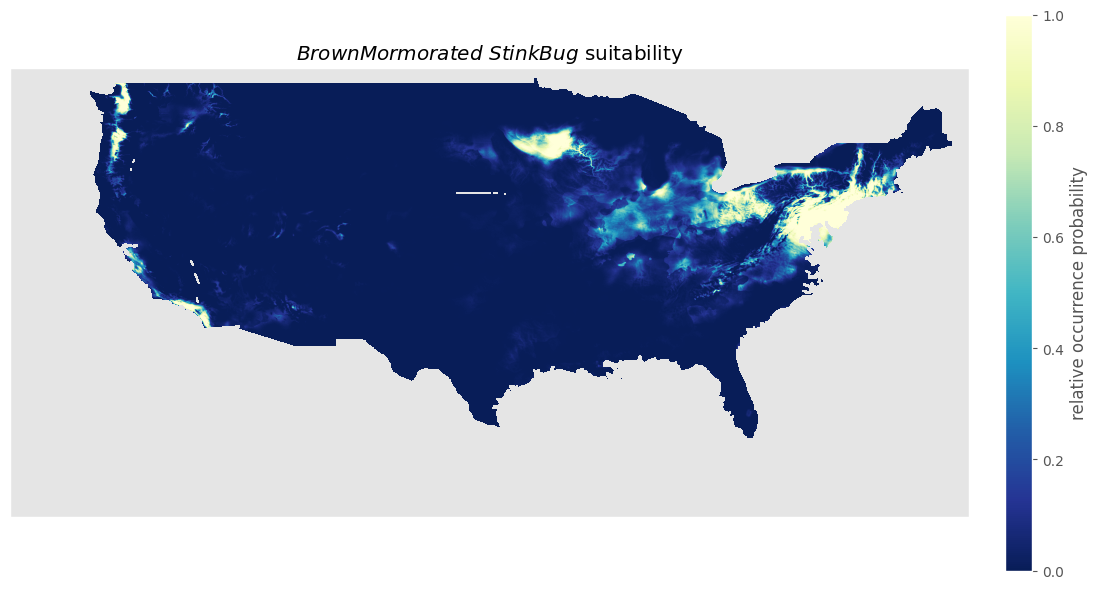

In [26]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot12 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar12 = plt.colorbar(plot12, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [27]:
# Save the colorbar as a TIFF file
colorbar_file12 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Annual_Precipitation_Chelsa_Prediction_2011_2040.tif'
cbar12.ax.figure.savefig(colorbar_file12, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_13_Precipitation_of_Wettest_Month_Chelsa_2011_2040.tif

In [28]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[12], count=10_000)
background.head()

0     POINT (-82.32083 39.72917)
1    POINT (-113.31250 35.73750)
2     POINT (-81.95417 30.17083)
3     POINT (-84.96250 43.09583)
4    POINT (-105.26250 48.57083)
dtype: geometry

In [29]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [30]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [31]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [32]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.981


In [33]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model13c.ela')

# Write the model predictions to disk
output_raster13 = 'Precipitation_of_Wettest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster13, quiet=True)

# Read into memory
with rio.open(output_raster13, 'r') as src:
    pred = src.read(1, masked=True)


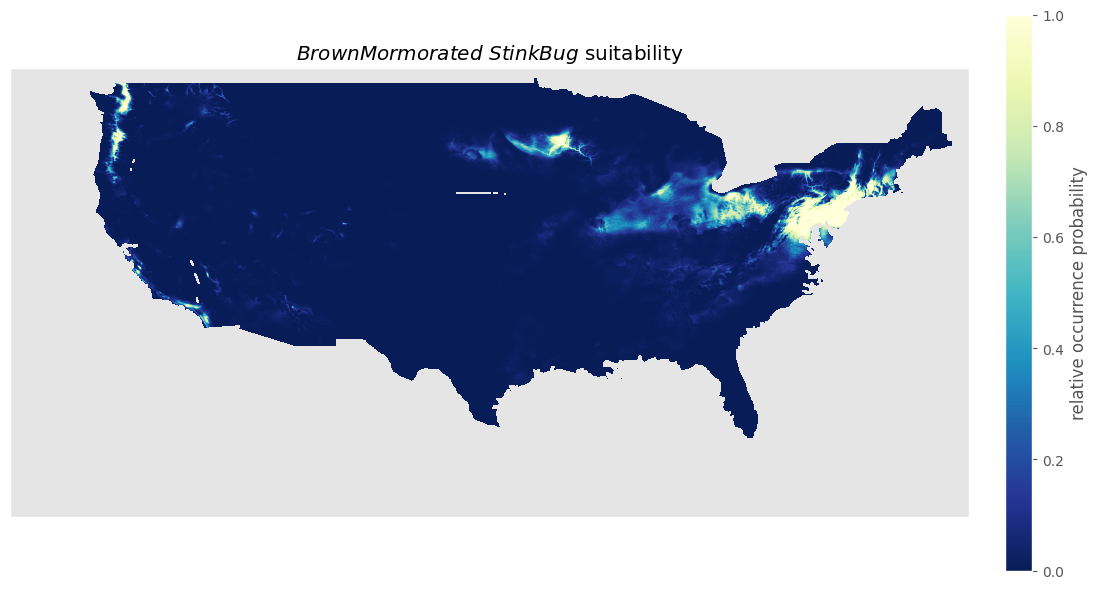

In [34]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot13 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar13 = plt.colorbar(plot13, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [36]:
# Save the colorbar as a TIFF file
colorbar_file13 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Precipitation_of_Wettest_Month_Chelsa_Prediction_2011_2040.tif'
cbar13.ax.figure.savefig(colorbar_file13, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_14_Precipitation_of_Driest_Month_Chelsa_2011_2040.tif

In [37]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[13], count=10_000)
background.head()

0    POINT (-116.47083 35.78750)
1     POINT (-86.37917 39.20417)
2    POINT (-100.11250 40.84583)
3     POINT (-88.59583 40.11250)
4    POINT (-117.98750 38.85417)
dtype: geometry

In [38]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [39]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [40]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [41]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.981


In [42]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model14c.ela')

# Write the model predictions to disk
output_raster14 = 'Precipitation_of_Driest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster14, quiet=True)

# Read into memory
with rio.open(output_raster14, 'r') as src:
    pred = src.read(1, masked=True)


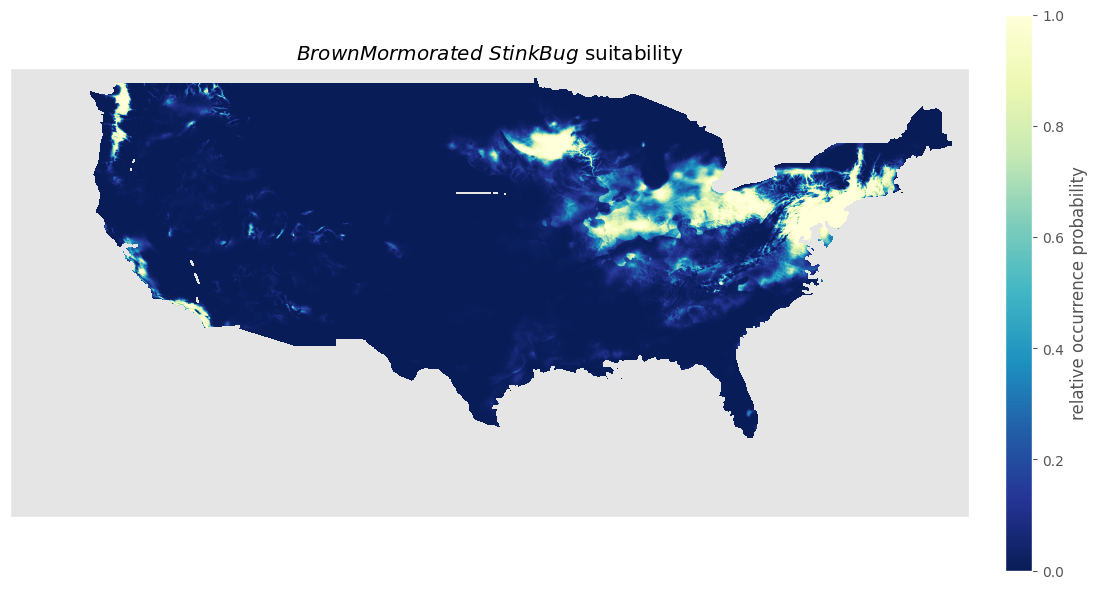

In [43]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot14 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar14 = plt.colorbar(plot14, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [44]:
# Save the colorbar as a TIFF file
colorbar_file14 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Precipitation_of_Driest_Month_Chelsa_Prediction_2011_2040.tif'
cbar14.ax.figure.savefig(colorbar_file14, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_15_Precipitation_of_Seasonality_Chelsa_2011_2040.tif

In [45]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[14], count=10_000)
background.head()

0    POINT (-118.96250 22.41250)
1    POINT (-124.97917 26.62083)
2     POINT (-82.88750 41.43750)
3    POINT (-107.72917 48.90417)
4     POINT (-72.67917 37.87083)
dtype: geometry

In [46]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [47]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [48]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [49]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.982


In [50]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model15c.ela')

# write the model predictions to disk
output_raster15 = 'Precipitation_of_Seasonality_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster15, quiet=True)

# Read into memory
with rio.open(output_raster15, 'r') as src:
    pred = src.read(1, masked=True)


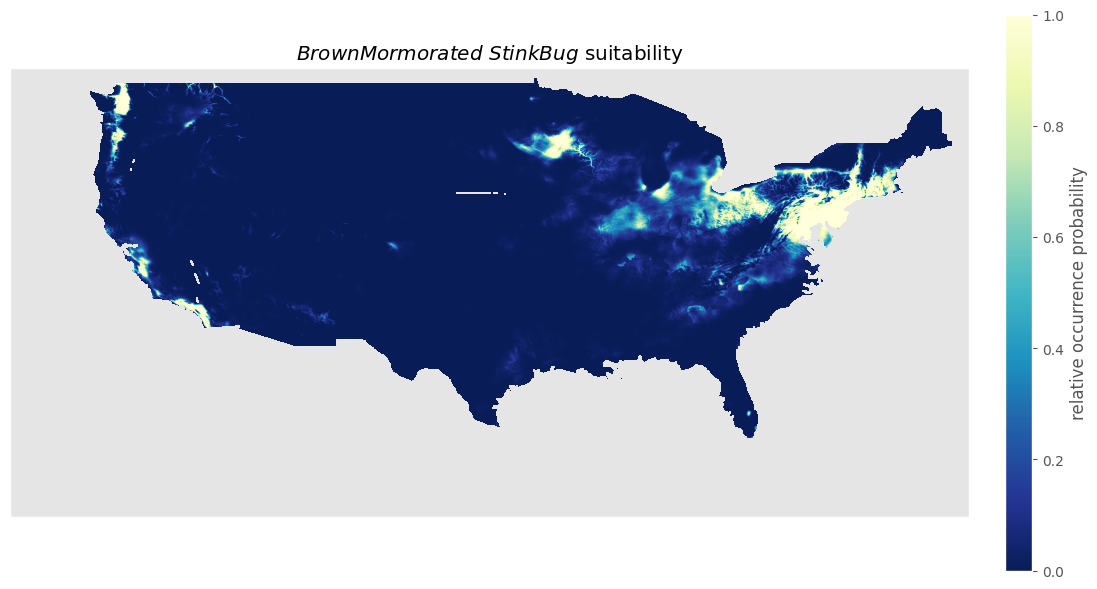

In [51]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot15 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar15 = plt.colorbar(plot15, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [52]:
# Save the colorbar as a TIFF file
colorbar_file15 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Precipitation_of_Seasonality_Chelsa_Prediction_2011_2040.tif'
cbar15.ax.figure.savefig(colorbar_file15, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_16_Precipitation_of_Wettest_Quarter_Chelsa_2011_2040.tif

In [53]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[15], count=10_000)
background.head()

0     POINT (-92.20417 33.17083)
1    POINT (-126.82083 32.90417)
2     POINT (-84.65417 40.53750)
3    POINT (-110.07083 37.44583)
4     POINT (-88.23750 28.37917)
dtype: geometry

In [54]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [55]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [56]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [57]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.982


In [58]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model16c.ela')

# Write the model predictions to disk
output_raster16 = 'Precipitation_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster16, quiet=True)

# Read into memory
with rio.open(output_raster16, 'r') as src:
    pred = src.read(1, masked=True)


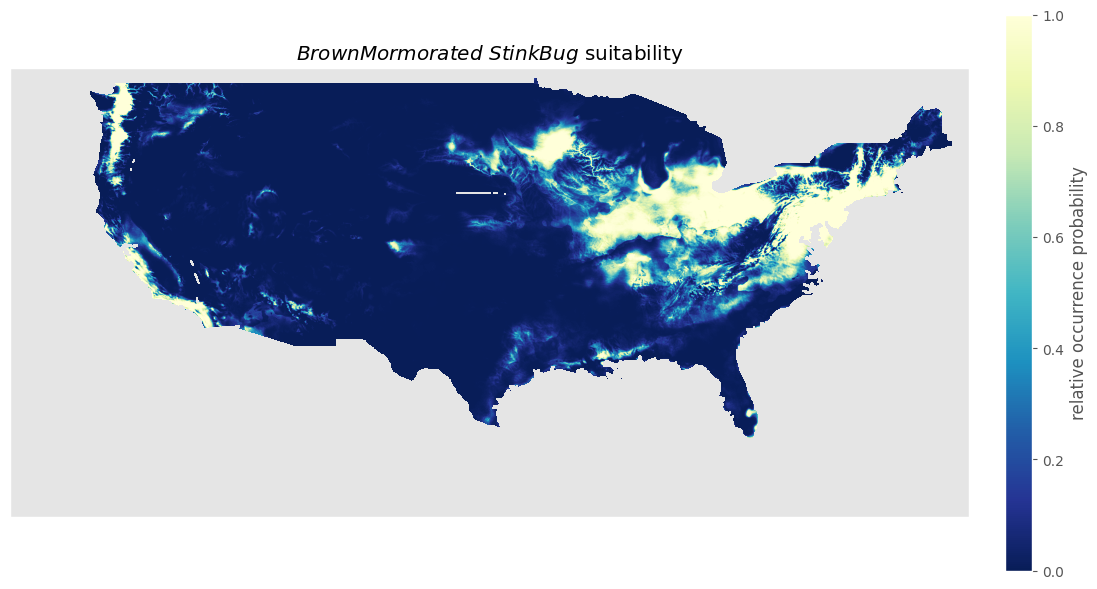

In [59]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot16 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar16 = plt.colorbar(plot16, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [61]:
# Save the colorbar as a TIFF file
colorbar_file16 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Precipitation_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar16.ax.figure.savefig(colorbar_file16, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_17_Precipitation_of_Driest_Quarter_Chelsa_2011_2040.tif

In [62]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[16], count=10_000)
background.head()

0    POINT (-111.66250 31.23750)
1     POINT (-87.81250 21.92083)
2    POINT (-109.96250 29.92917)
3    POINT (-125.76250 41.47083)
4    POINT (-119.92917 30.78750)
dtype: geometry

In [63]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [64]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [65]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [66]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.984


In [67]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model17c.ela')

# Write the model predictions to disk
output_raster17 = 'Precipitation_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster17, quiet=True)

# Read into memory
with rio.open(output_raster17, 'r') as src:
    pred = src.read(1, masked=True)


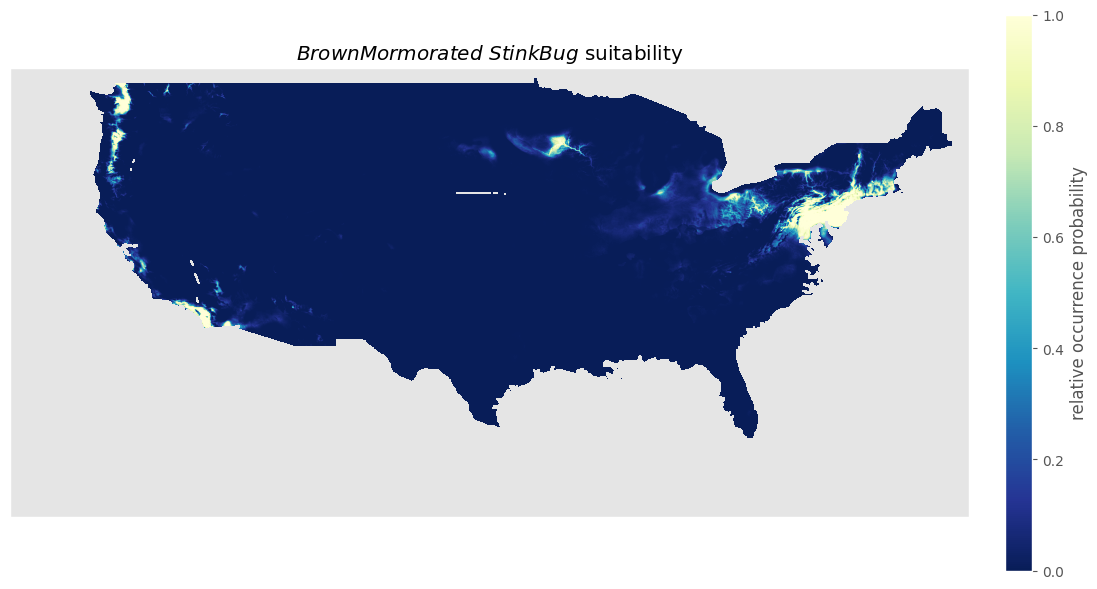

In [68]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot17 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar17 = plt.colorbar(plot17, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [69]:
# Save the colorbar as a TIFF file
colorbar_file17 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Precipitation_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar17.ax.figure.savefig(colorbar_file17, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_18_Precipitation_of_Warmest_Quarter_Chelsa_2011_2040.tif

In [70]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[17], count=10_000)
background.head()

0     POINT (-91.59583 44.88750)
1     POINT (-94.10417 44.72917)
2     POINT (-98.27083 23.58750)
3     POINT (-69.43750 30.49583)
4    POINT (-111.76250 25.73750)
dtype: geometry

In [71]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [72]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [73]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [74]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.982


In [75]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model18c.ela')

# Write the model predictions to disk
output_raster18 = 'Precipitation_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster18, quiet=True)

# Read into memory
with rio.open(output_raster18, 'r') as src:
    pred = src.read(1, masked=True)


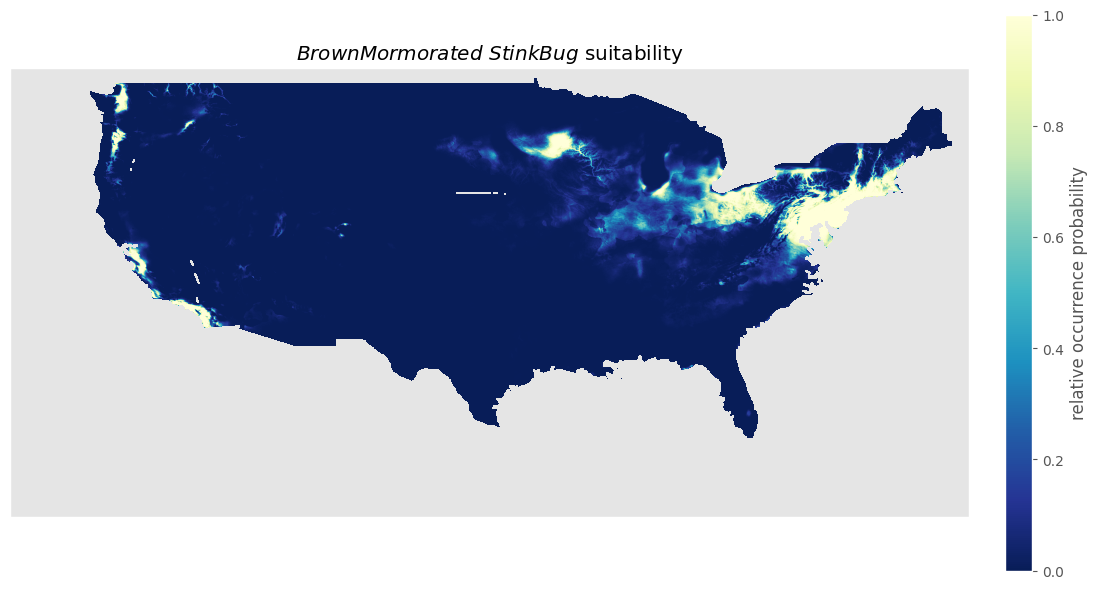

In [76]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot18 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar18 = plt.colorbar(plot18, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [77]:
# Save the colorbar as a TIFF file
colorbar_file18 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Precipitation_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar18.ax.figure.savefig(colorbar_file18, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_19_Precipitation_of_Coldest_Quarter_Chelsa_2011_2040.tif

In [78]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[18], count=10_000)
background.head()

0     POINT (-67.87083 33.57083)
1     POINT (-71.24583 47.05417)
2     POINT (-82.40417 37.40417)
3     POINT (-76.08750 20.71250)
4    POINT (-118.62083 49.45417)
dtype: geometry

In [79]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [80]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [81]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [82]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.983


In [83]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model19c.ela')

# Write the model predictions to disk
output_raster19 = 'Precipitation_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'

#Applies a trained model to a list of raster datasets
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster19, quiet=True)

# Read into memory
with rio.open(output_raster19, 'r') as src:
    pred = src.read(1, masked=True)


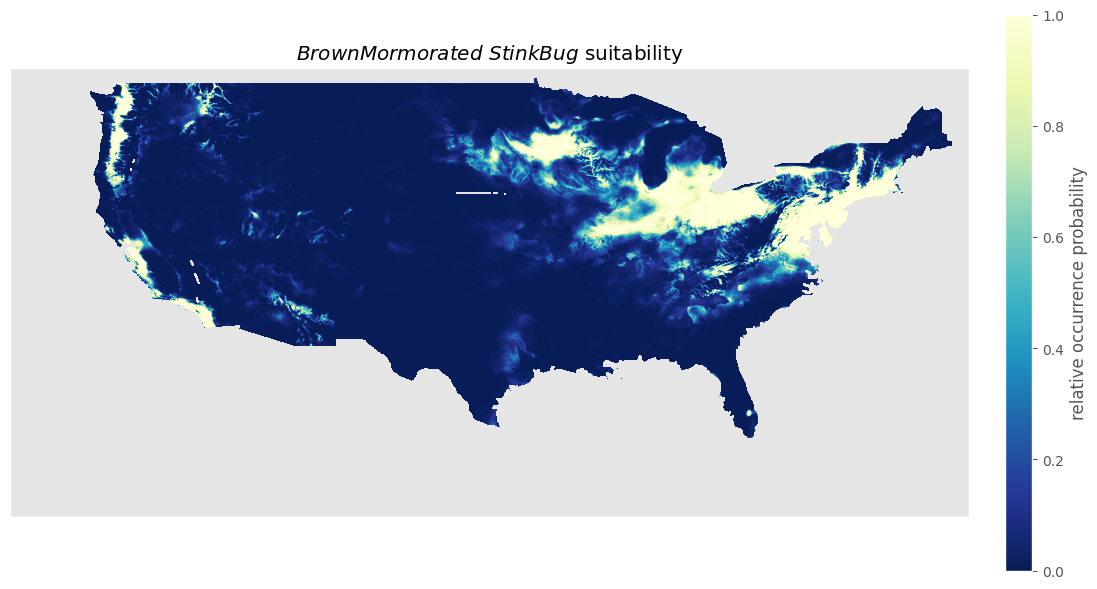

In [84]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot19 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar19 = plt.colorbar(plot19, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [93]:
# Save the colorbar as a TIFF file
colorbar_file19 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_2011-2040/Precipitation_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar19.ax.figure.savefig(colorbar_file19, format='tiff')

# Close the figure to free up memory
plt.close(fig)